In [1]:
import sys, os, time
import shutil
# %load_ext autoreload
# %autoreload 2
os.environ['FOUNDATION_RUN_MODE'] = 'jupyter'
os.environ['FOUNDATION_SAVE_DIR'] = '/is/ei/fleeb/workspace/chome/trained_nets'
os.environ['FOUNDATION_DATA_DIR'] = '/is/ei/fleeb/workspace/local_data'
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from IPython import display
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.distributions as distrib
import torch.multiprocessing as mp
import torchvision.models
import torchvision

from torch.utils.data import Dataset, DataLoader, TensorDataset
import gym
import numpy as np
%matplotlib notebook
# %matplotlib tk
import matplotlib.pyplot as plt
import imageio
import seaborn as sns
# plt.switch_backend('Agg') #('Qt5Agg')
import foundation as fd
from foundation import models
from foundation import util
from foundation import train

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from bisect import bisect_left

# from IPython.display import HTML, Image

#from foundation.util import replicate, Cloner

from hybrid import get_model, get_data
from analyze import *

from tqdm import tqdm_notebook as tqdm

plt.ioff()

np.set_printoptions(linewidth=120, suppress=True)

In [2]:
M = Hybrid_Controller().filter_strs('!test')

Found 233 runs


In [3]:
# M.clear_filters().filter_strs('!test').filter_jobs(167, 168).show_incomplete()

In [4]:
M.clear_run_cache()

In [5]:
M.clear_filters().filter_strs('!test')

# M.filter_since(date='200114').filter_data('rgbball')
# M.filter_jobs(157, 158)
# M.filter_jobs(169)
# M.filter_jobs(138)
M.filter_jobs(174, 175)
# M.filter_models('vae')
# M.filter_jobs(94, 122) # basic models
# M.filter_jobs(100, 102)
# M.filter(lambda r: 'adain-dec' in r.config.info.history)
# M.filter_models('wae')

M.filter_checkpoints(60)

# M.load_configs(60)

M.load_configs()

M.show()

Selecting checkpoint: last


/is/ei/fleeb/workspace/foundation/foundation/train/config.py:66: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f)


  0 - 3dshapes-fvae_0174-6007668-07_200122-210719
  1 - 3dshapes-fvae_0174-6007668-08_200122-210745
  2 - 3dshapes-fvae_0174-6007668-09_200122-210741
  3 - 3dshapes-fwae_0174-6007668-04_200122-205919
  4 - 3dshapes-fwae_0174-6007668-05_200122-210402
  5 - 3dshapes-fwae_0174-6007668-06_200122-210602
  6 - 3dshapes-vae_0174-6007668-02_200122-204250
  7 - 3dshapes-vae_0174-6007668-03_200122-205908
  8 - 3dshapes-wae_0174-6007668-00_200122-204130
  9 - 3dshapes-wae_0174-6007668-01_200122-204131
 10 - 3dshapes-wgan_0174-6007668-13_200122-211507


In [6]:
M.show_unique()

  0) 3dshapes-fvae_0174-6007668-07_200122-210719
	model.latent_dim - 12 (16)
	model.latent_reg_wt - 2 (1)

  1) 3dshapes-fvae_0174-6007668-08_200122-210745
	model.latent_dim - 12 (16)
	model.latent_reg_wt - 8 (1)

  2) 3dshapes-fvae_0174-6007668-09_200122-210741
	model.latent_dim - 12 (16)
	model.latent_reg_wt - 5 (1)
	model.reg_prior - 0.2 (0.5)

  3) 3dshapes-fwae_0174-6007668-04_200122-205919
	model.latent_dim - 12 (16)

  4) 3dshapes-fwae_0174-6007668-05_200122-210402
	model.latent_dim - 12 (16)
	model.latent_reg_wt - 1000 (100)
	model.reg_prior - 0.1 (0.5)

  5) 3dshapes-fwae_0174-6007668-06_200122-210602
	model.latent_dim - 12 (16)
	model.latent_reg_wt - 1000 (100)
	model.reg_prior - 0.01 (0.5)

  6) 3dshapes-vae_0174-6007668-02_200122-204250
	model.latent_dim - 12 (16)

  7) 3dshapes-vae_0174-6007668-03_200122-205908
	model.latent_dim - 12 (16)
	model.latent_reg_wt - 4 (1)

  8) 3dshapes-wae_0174-6007668-00_200122-204130
	model.latent_dim - 12 (16)

  9) 3dshapes-wae_0174-600766

In [7]:
M.clear_run_cache()

In [8]:
run = M[3]
run.name

'3dshapes-fwae_0174-6007668-04_200122-205919'

In [9]:
run.reset()

run.load(pbar=tqdm)
run.run(pbar=tqdm)

/is/ei/fleeb/workspace/chome/trained_nets/3dshapes-fwae_0174-6007668-04_200122-205919/checkpoint_100.pth.tar
True
load successful
Loaded /is/ei/fleeb/workspace/chome/trained_nets/3dshapes-fwae_0174-6007668-04_200122-205919/checkpoint_100.pth.tar
Set dataroot to: /is/ei/fleeb/workspace/local_data
name: 3dshapes
Not enough memory to move dataset to cuda
Dataset din=(3, 64, 64), dout=(3, 64, 64)
Model-type: fwpp
latent_disc: None (by default)
reg_prior: 0.5
ldisc_steps: 1 (by default)
ldisc_gp: 10.0 (by default)
encoder (type=double-enc): 
  in_shape --> din: (3, 64, 64) (by parent)
  channels: [64, 64, 64, 128, 128] (by parent)
  factors: 2 (by parent)
  internal_channels: [None, None, None, None, None] (by default)
  squeeze: [False, False, False, False, False] (by default)
  output_nonlin: None (by default)
  latent_dim: 12 (by parent)
  tail (type=nn): 
    input_dim --> din: (128, 2, 2)
    output_dim --> dout: 12
    hidden_dims: [256, 128]
    nonlin: elu (by parent)
    output_non


torch.Size([38400, 12])


In [10]:
viz = run.visualize(tqdm)
len(viz), viz.keys()

torch.Size([38400, 12])



(7,
 dict_keys(['original', 'recs', 'gens', 'hybrid', 'latent', 'effects', 'traversals']))

<IPython.core.display.Javascript object>


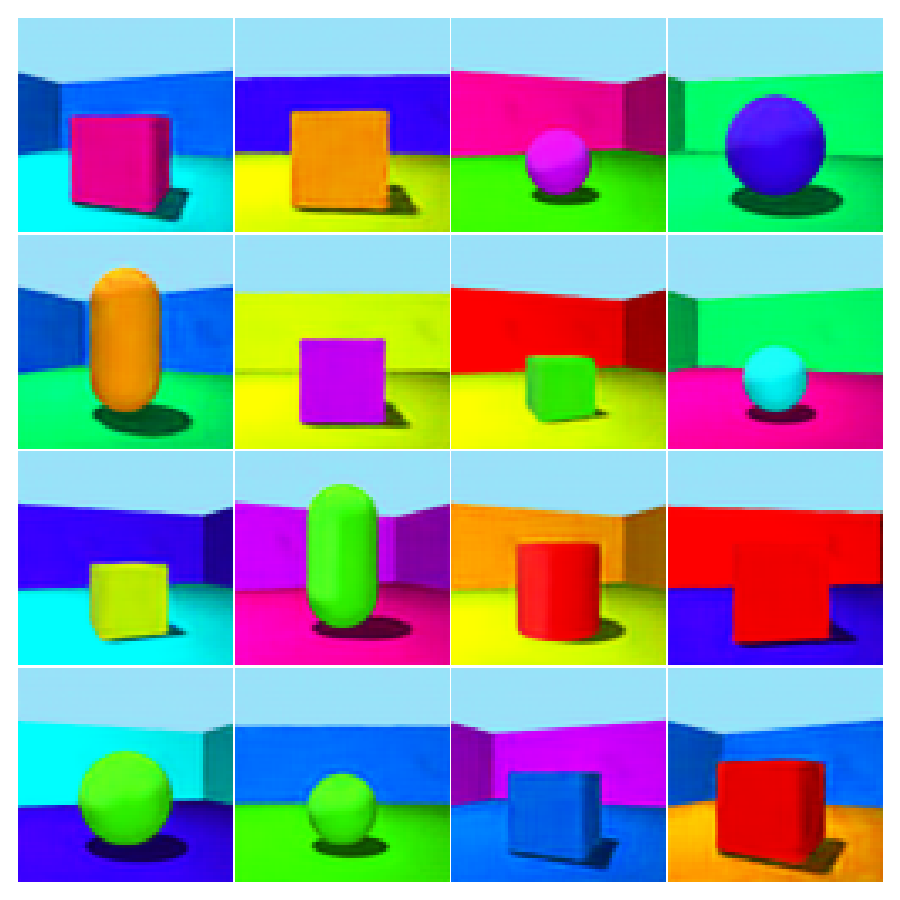

In [11]:
viz['recs'][0].view(scale=2)

<IPython.core.display.Javascript object>


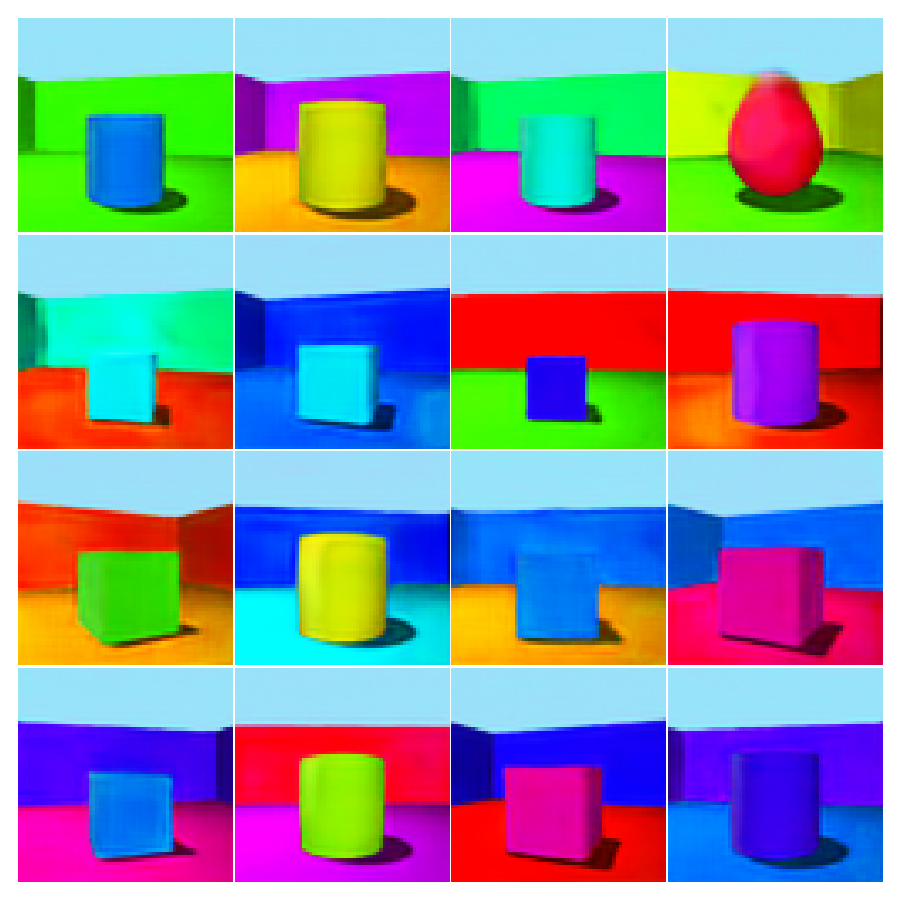

In [12]:
viz['hybrid'][0].view(scale=2)

<IPython.core.display.Javascript object>


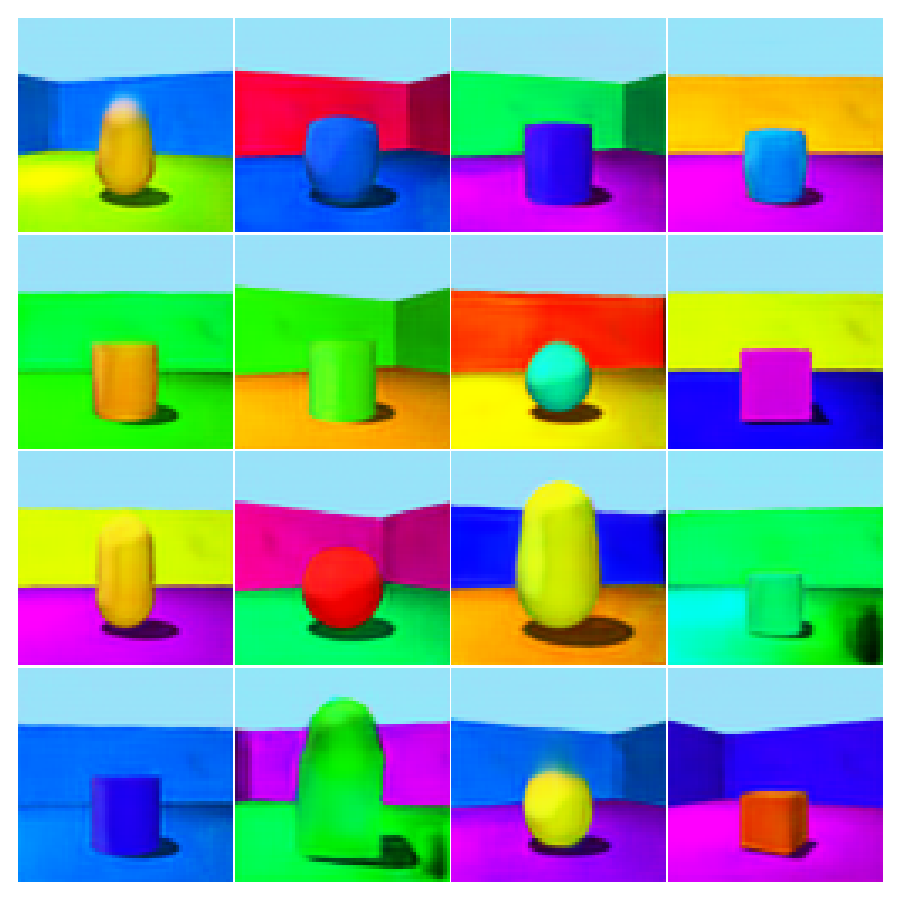

In [13]:
viz['gens'][0].view(scale=2)

In [14]:
viz['traversals'][1].view(scale=2)

<IPython.core.display.Javascript object>


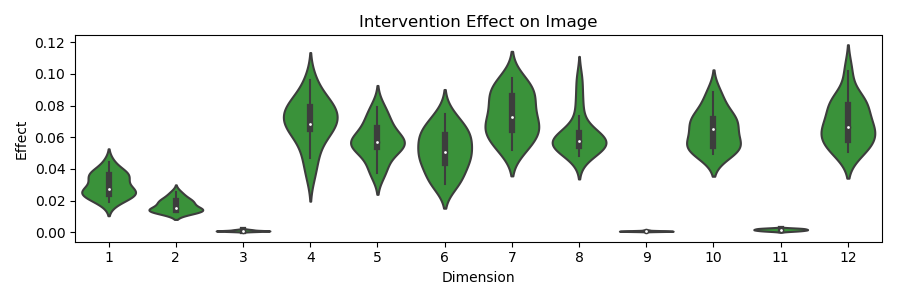

In [15]:
viz['effects'][0].view(scale=2)

<IPython.core.display.Javascript object>


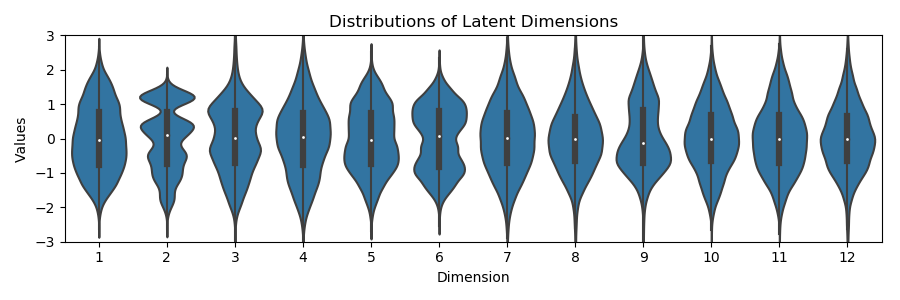

In [16]:
fig = viz['latent'][0].view(scale=2)
# plt.figure(fig.number)
# ax = fig.get_axes()[0]
# ax.set_ylim(-3, 3)
fig

In [17]:
run.evaluate(pbar=tqdm)

Took 0.06 s



{'IRS': {'IRS': 0.6066629457244229, 'num_active_dims': 12.024467}}

In [19]:
model = run.state.model
model

Factor_WPP(
  (enc): Double_Encoder(
    (layers): ModuleList(
      (0): DoubleConvLayer(
        residual=False
        (conv): Conv2d(3, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
        (nonlin): ELU(alpha=1.0, inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1))
        (down): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (norm): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (out_nonlin): ELU(alpha=1.0, inplace=True)
      )
      (1): DoubleConvLayer(
        residual=False
        (conv): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
        (nonlin): ELU(alpha=1.0, inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(2, 2), stride=(1, 1))
        (down): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (norm): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
 

In [20]:
model.optim

Complex_Optimizer (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 8.000000000000001e-06
    weight_decay: 0

Parameter Group 1
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 8.000000000000001e-06
    weight_decay: 0
)

In [ ]:
model.set_optim()

In [21]:
run.keys()

odict_keys(['name', 'path', '_manager', 'progress', 'splits', 'ckpt_path', 'config', 'base', 'diffs', 'state'])

In [22]:
run.state.keys()

odict_keys(['ckpt_path', 'A', 'trainset', 'dataset', 'other', 'model', 'ckpt', 'records', 'loader', 'img_W', 'border', 'between', 'batch', 'X', 'rec', 'gen', 'hyb', 'q', 'p', 'h', 'qdis', 'qmle', 'int_q', 'dis_int_q', 'all_diffs', 'saved_walks', 'full_q', 'figs', 'repr_fn', 'dis_dataset', 'evals'])

In [23]:
run.state.ckpt.keys()

dict_keys(['model_str', 'model_state', 'records', 'epoch_seed'])

In [25]:
run.state.ckpt['model_state'].keys()

dict_keys(['model', 'optim', 'scheduler'])

In [18]:
# media_root = '/is/ei/fleeb/workspace/media/hybrid/new/3dshapes/vaes'
# run.save('test_model/')